## Linear regression

In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()


#### Select feature

##### Read data

- Practice training

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,0.932769,4,6,8.0,-2.310335,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.086461,4,5,6.0,-2.252332,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.086461,4,5,4.0,-2.252332,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-1.324053,4,6,4.0,-2.231861,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.907489,1,1,5.0,-2.139739,1,0,0,1,0


##### Input variables

- Practice training

In [4]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,0.932769,4,8.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.086461,4,6.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.086461,4,4.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-1.324053,4,4.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.907489,1,5.0,1,0,0,1,0


##### Target variables

- Practice training

In [5]:
y = df[['Price']]
y.head()

,Price
0,-2.310335
1,-2.252332
2,-2.252332
3,-2.231861
4,-2.139739


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=43)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(1760, 12) (755, 12)
(1760, 1) (755, 1)


#### Model training

##### Create a linear regression model object from the linear_model library and train it with input and target variables

In [7]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train, y_train)

LinearRegression()

##### Correlation Coefficient and Intercept Deviation Value

In [8]:
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[ 2.85431588e+02  1.00925925e+02  4.62119811e-01  1.04183329e-12
  -2.05023379e-01 -2.11766779e-01 -2.30007845e-02 -2.97330285e-01
  -8.14847088e-01 -2.85477134e-01 -1.14129293e-01 -1.03680934e-01]]
Interception  :  [-3377.14482136]


##### Real estate price prediction

- On the train set

In [9]:
y_pred_train = regr.predict(X_train)
y_pred_train

array([[-1.35807547],
       [ 0.30506987],
       [ 0.19178797],
       ...,
       [ 0.58846509],
       [ 0.15376417],
       [-0.13893411]])

- Prediction on validation set

In [10]:
y_pred_validation = regr.predict(X_validation)
y_pred_validation

array([[ 2.20543033e-01],
       [-2.38607639e-01],
       [ 5.33403636e-02],
       [ 2.72290326e-01],
       [-8.68289577e-01],
       [-2.12511073e-01],
       [ 5.47287294e-03],
       [ 6.08531325e-01],
       [-2.13585824e-01],
       [ 5.27967791e-01],
       [ 1.16354241e-01],
       [-2.57985434e-02],
       [ 4.00402040e-02],
       [ 1.81194358e-01],
       [-1.00780039e+00],
       [-1.19066545e-01],
       [ 1.67298929e-01],
       [-9.26240700e-02],
       [ 3.28837258e-02],
       [ 1.56508211e-01],
       [-5.59226326e-01],
       [-1.41238748e+00],
       [ 7.11137106e-02],
       [ 4.44662919e-01],
       [ 1.54678607e+00],
       [ 5.95022550e-01],
       [-2.46865497e-01],
       [ 4.36675896e-01],
       [-1.37575490e-01],
       [-7.54803826e-02],
       [-1.77190640e-02],
       [ 2.32917096e-01],
       [-3.05579751e-01],
       [-1.64032340e-01],
       [-3.86418635e-01],
       [-2.07674225e-01],
       [ 3.58130434e-01],
       [-3.39534456e-01],
       [ 3.4

#### Model Evaluation

##### Calculation of mean square error MSE

- Train set

In [11]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.6199402369253431


- Validation set

In [12]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.5391067837161804


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [13]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.40075477146763305


- Validation set

In [14]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: 0.4122675485840256


##### 4.3 MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [15]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 7.525802727080625


- Validation set

In [16]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 5.644826127044291


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

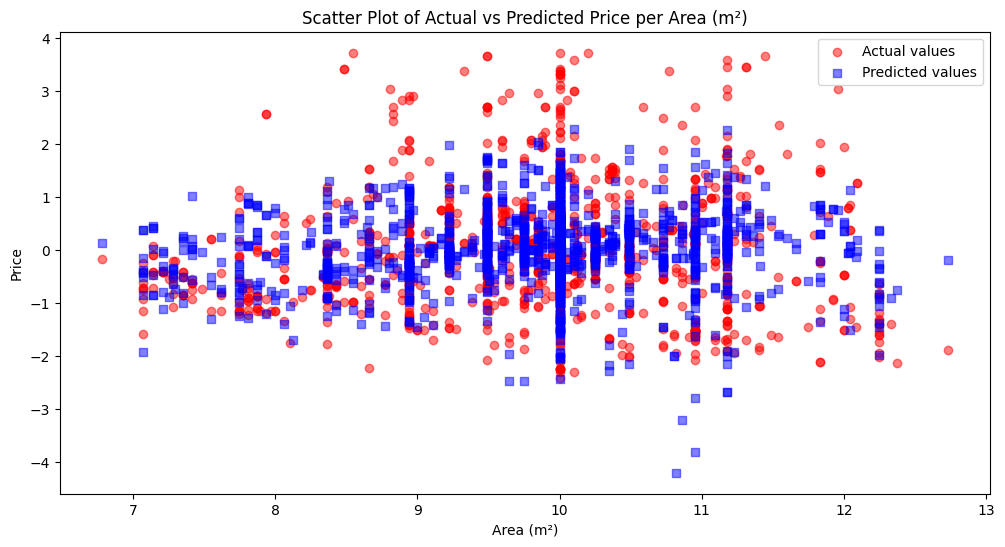

In [17]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

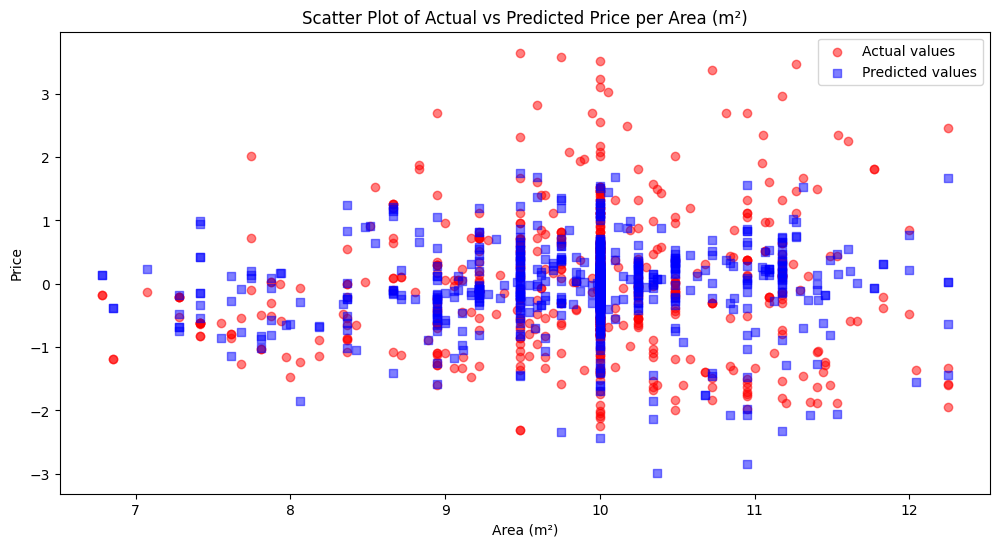

In [18]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

- Linear Regression is a supervised learning algorithm, used to estimate the relationship between independent variables and dependent variables. It is a statistical method used to find the best linear function to represent this relationship.
- Based on the assumption that the correlation between variables is linear, this algorithm predicts the value of the target variable from the values ​​of the input variables.
- This method is considered Simple Regression, prone to Overfitting with large data sets
- This method is also unstable, when the value of random_state changes, it can lead to fluctuations in the performance of the model.